In [79]:
import pandas as pd
from ast import literal_eval
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("data.csv")
df[df.columns[1]] = df[df.columns[1]].apply(lambda x : literal_eval(x))
df[df.columns[12]] = df[df.columns[12]].apply(lambda x : literal_eval(x))
df[df.columns[13]] = df[df.columns[13]].apply(lambda x : literal_eval(x))

In [12]:
copyright_holders = df["copyrights_text"]

## Some songs have no copyright holder

Not sure if this is a mistake or can happen but we aim to ignore these when we label

In [23]:
copyright_holders[copyright_holders.apply(len)==0]

9874     []
9878     []
9974     []
9978     []
10074    []
10078    []
10174    []
10178    []
10274    []
10278    []
10374    []
10378    []
10474    []
10478    []
10574    []
10578    []
10674    []
10678    []
10774    []
10778    []
10874    []
10878    []
10974    []
10978    []
11074    []
11078    []
11174    []
11178    []
11274    []
11278    []
         ..
35975    []
35991    []
36007    []
36023    []
36039    []
36055    []
36071    []
36087    []
36103    []
36119    []
36135    []
36151    []
36167    []
36183    []
36199    []
36215    []
36231    []
36247    []
36263    []
36279    []
36295    []
36311    []
36327    []
36343    []
36359    []
36375    []
36391    []
36407    []
36423    []
36439    []
Name: copyrights_text, Length: 300, dtype: object

### One example:

In [14]:
df.iloc[9874]

track_name                    Phase 09 - Sombrero
artists                            [Solar Fields]
in_australia                                False
song_id                    0atOMgnZQ0bkSzDacwkKwB
album_id                   64oJjdIQtrNWEMCplxiKu1
duration (ms)                              343733
explicit                                    False
popularity                                      3
song_type                                   track
album_name                  Until We Meet the Sky
label                             Ultimae Records
album_popularity                                2
copyrights_text                                []
copyrights_flag                                []
playlist_name       Songs To Test Headphones With
Name: 9874, dtype: object

### Label all UMG owned songs

Do this by looking for either UMG or Universal in copyright holders text

In [18]:
claimed_copyright = copyright_holders[copyright_holders.apply(len)!=0]
# for idx, val in claimed_copyright.val:
#     print(idx)

In [19]:
idx_of_UMG_copyright = []
for idx, copyright in zip(claimed_copyright.index, claimed_copyright.values):
    for i in copyright:
        if ("UMG" in i) or ("Universal" in i):
            idx_of_UMG_copyright.append(idx)
            break

In [24]:
print(f"Percentage of UMG owned songs: {copyright_holders[idx_of_UMG_copyright].shape[0]/copyright_holders.shape[0]*100:.2f}%")

%age of UMG owned songs: 10.67%


This implies out of the scrape, Universal owns 10% of the scraped catalogue. This is much lower than the quoted 30%. This is most likely a product of the scrape not being a fair and random representative of the spotify catalogue. 

In [21]:
df['owned_by_UMG'] = [0]*len(df)
for idx in idx_of_UMG_copyright:
    # Most recently created column so it'll be at the end
    df.iat[idx, -1] = 1

# Analysis Post Labelling

Now that we have labels, we can look at details between playlists about the UMG holdings

### Questions to answer

#### 1. Does universal own typically 30% of a playlist
#### 2. Does universal have more popular songs?


# Ownership

In [31]:
percentage_owned = df.groupby("playlist_name")['owned_by_UMG'].value_counts() /
                    df.groupby("playlist_name")['owned_by_UMG'].apply(len) * 100

In [73]:
percentage_owned

playlist_name              owned_by_UMG
#FlashbackFriday           0                94.000000
                           1                 6.000000
#Hotmess                   0                94.000000
                           1                 6.000000
#JazzAppreciationMonth     0                80.000000
                           1                20.000000
#MakeitHappen              0                94.000000
                           1                 6.000000
#SundayFunday              0                78.000000
                           1                22.000000
#ThrowbackThursday         0                85.000000
                           1                15.000000
'90s Baby Makers           0               100.000000
(Descent) A Beginning      0                80.000000
                           1                20.000000
0110                       0                92.000000
                           1                 8.000000
101_FTB                    0              

In [80]:
UMG = percentage_owned.iloc[percentage_owned.index.get_level_values('owned_by_UMG') == 1]

In [81]:
UMG.describe()

count    698.000000
mean      12.873845
std        7.460211
min        2.000000
25%        7.000000
50%        8.695652
75%       20.000000
max       26.000000
Name: owned_by_UMG, dtype: float64

From these statistics we see that an average playlist will contain 12.87% ($\pm$ 7.46) of Universal owned song

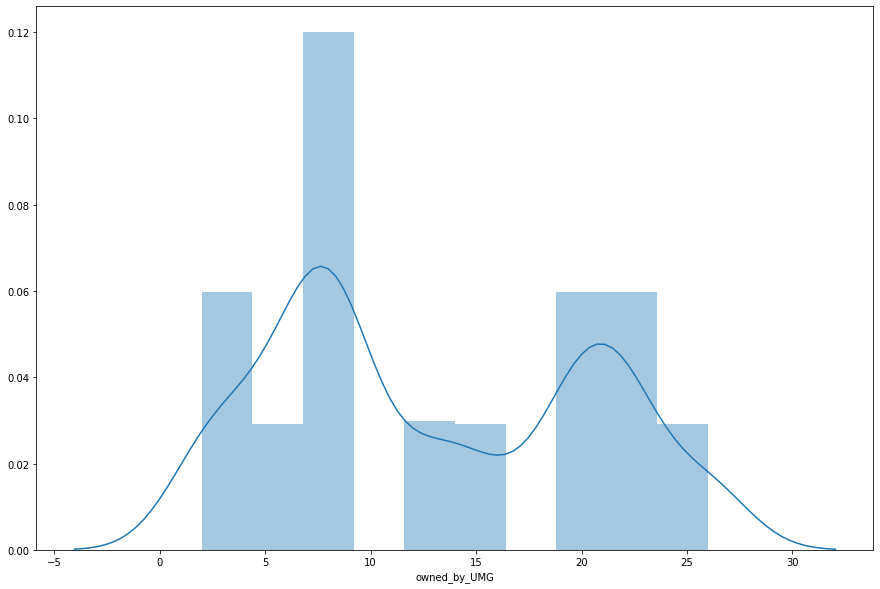

In [86]:
plt.figure(figsize=(15,10))
sns.distplot(UMG, bins=10)

This looks distinctly bimodal so maybe the statistics aren't the best description. Here it looks like there are two distinct sets of data. One with an average of $\sim 7\%$ of UMG music and one with $\sim 21\%$ of music. A couple of reasons why this could possible exist:

    1. Music labels may tend to sign similar acts (ones that align with their brand, and they think they can grow) and so as playlists tend to group like with like based on a persons preference this split may reflect that. Although that effect doesn't look to be strong due to the small seperation of the gaussians.
    2. More data needs to be collected. This isn't actually representative of the overall dataset. This is the data pulled from spotify's generated playlist and thus not a typically sample of the user population


Thus based on the current data, Universal **doesn't** typically owned 30% of a users playlist. An upper estimate for ownership is about $\sim 21\%$ as mentioned prior.

# Popularity

When looking at whether a song is represented by Universal or a Universal subsidiary, is there a difference in popularity?

In [90]:
df.groupby("owned_by_UMG").describe()['popularity'].T

owned_by_UMG,0,1
count,43102.000000,5150.000000
mean,37.530787,43.009709
std,25.483023,29.261810
min,0.000000,0.000000
25%,7.000000,10.000000
50%,45.000000,50.000000
75%,56.000000,64.000000
max,93.000000,100.000000


Here UMG appears to have have more popular songs based on the song data pulled

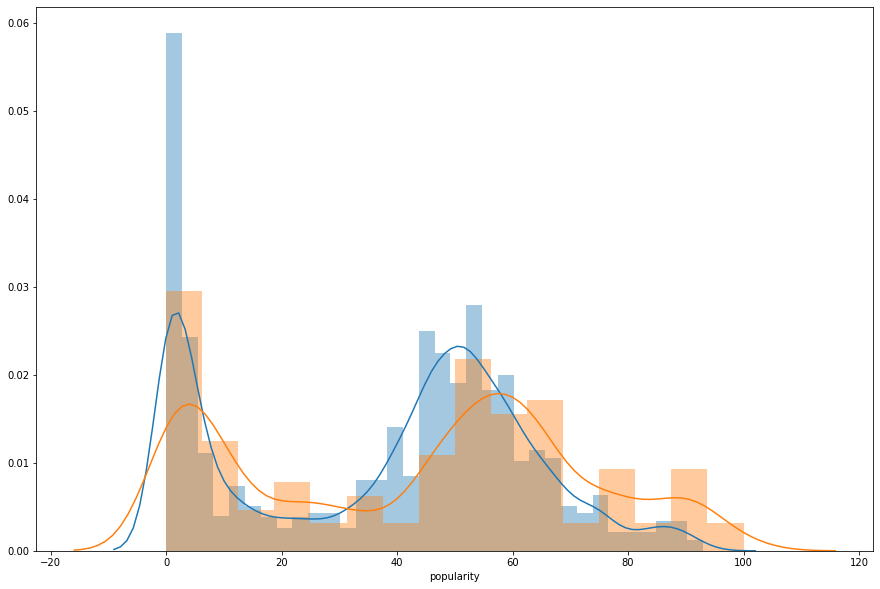

In [100]:
plt.figure(figsize=(15,10))
sns.distplot(df[df['owned_by_UMG']==0]['popularity'])
sns.distplot(df[df['owned_by_UMG']==1]['popularity'])

Yes, there is a slight popularity boost with the artists owned by Universal. However this could be a chicken and the egg situation, does Universal tend to sign acts that are popular or do they sign acts they become popular. Also this could be a result of sample bias due to the fact that when scraping over spotify's top playlists. 